## Look at BLING output

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

In [2]:
# BLING:

folder_EPM101 = '/ocean/brogalla/GEOTRACES/BLING-EPM101/'
# folder_EPM102 = '/ocean/brogalla/ANHA4/BLING-EPM102/'

dset = xr.open_dataset(folder_EPM101+'ANHA4-EPM101_y2002m08d13_gridB.nc')
ANHA4_lons = dset['nav_lon'].values
ANHA4_lats = dset['nav_lat'].values
ANHA4_depths = dset['deptht'].values

file_range = ['ANHA4-EPM101_y2002m08d18_gridB.nc', 'ANHA4-EPM101_y2002m08d23_gridB.nc', 'ANHA4-EPM101_y2002m08d28_gridB.nc', \
              'ANHA4-EPM101_y2002m09d02_gridB.nc', 'ANHA4-EPM101_y2002m09d07_gridB.nc', 'ANHA4-EPM101_y2002m09d12_gridB.nc', \
              'ANHA4-EPM101_y2002m09d17_gridB.nc', 'ANHA4-EPM101_y2002m09d22_gridB.nc', 'ANHA4-EPM101_y2002m09d27_gridB.nc', \
              'ANHA4-EPM101_y2002m10d02_gridB.nc', 'ANHA4-EPM101_y2002m10d07_gridB.nc']

biomass_p = np.zeros((50,800,544))
fpop_p    = np.zeros((50,800,544))
jp_pop    = np.zeros((50,800,544))
for n,file in enumerate(file_range):
    dset = xr.open_dataset(folder_EPM101+file)
    biomass_p = biomass_p + dset['biomass_p'][0,:,:,:].drop(labels=['time_centered', 'time_counter']).values
    fpop_p    = fpop_p    + dset['fpop'][0,:,:,:].drop(labels=['time_centered', 'time_counter']).values
    jp_pop    = jp_pop    + dset['jp_pop'] [0,:,:,:].drop(labels=['time_centered', 'time_counter']).values
    
biomass = biomass_p / n
fpop    = fpop_p / n
jppop   = jp_pop / n 

In [3]:
def plot_slicemap(variable, depth_slice, vmin=0, vmax=1e-9, cmap=cmocean.cm.matter):
    fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj(ANHA4_lons, ANHA4_lats)

    cb = proj.contourf(x, y, variable[depth_slice,:,:], cmap=cmap, vmin=vmin, vmax=vmax, levels=20)
    
    proj.scatter(x[680,190], y[680,190], c='c', zorder=5, s=20) # Canada basin
    proj.scatter(x[480,195], y[480,195], c='g', zorder=5, s=20) # baffin bay
    proj.scatter(x[585,153], y[585,153], c='y', zorder=5, s=20) # CAA
    proj.scatter(x[400,185], y[400,185], c='r', zorder=5, s=20) # labrador sea
    
    cbaxes  = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 
    CBar    = plt.colorbar(cb , ax=ax, cax=cbaxes, format='%.2e') 
    CBar.ax.tick_params(axis='y', length=0, labelsize=6)
    CBar.set_label('fPOP', fontsize=7)
    
    return

In [4]:
print(np.nanmax(jppop[0,:,:]))
print(np.nanmax(jppop[10,:,:]))
print(np.nanmax(jppop[15,:,:]))
print(np.nanmax(jppop[20,:,:]))
print(np.nanmax(jppop[25,:,:]))
print(np.nanmax(jppop[30,:,:]))

1.2467018584150225e-09
2.106392571477045e-09
1.9920101901327313e-09
1.0049337084705457e-09
8.812026230249622e-12
2.0788148221055197e-14


In [5]:
print(np.nanmax(fpop[0,:,:]))
print(np.nanmax(fpop[10,:,:]))
print(np.nanmax(fpop[15,:,:]))
print(np.nanmax(fpop[20,:,:]))
print(np.nanmax(fpop[25,:,:]))
print(np.nanmax(fpop[30,:,:]))

1.2372256386061764e-09
1.3920680785872718e-08
1.4607665033139482e-08
9.715053561620835e-09
5.314579309967371e-09
1.5166377154152144e-09


In [6]:
print(np.nanmax(biomass[0,:,:]))
print(np.nanmax(biomass[10,:,:]))
print(np.nanmax(biomass[15,:,:]))
print(np.nanmax(biomass[20,:,:]))
print(np.nanmax(biomass[25,:,:]))
print(np.nanmax(biomass[30,:,:]))

0.0003457428130786866
0.0002974442613776773
0.00019944729137932882
6.389886002580169e-05
1.3741314246917824e-06
2.135148638051485e-08


In [7]:
wsink                    = np.ones(ANHA4_depths.shape)*16/(3600*24) # convert from m/day to m/s
wsink[ANHA4_depths > 80] = (0.05*(ANHA4_depths[ANHA4_depths > 80]-80)+16)/(3600*24) 
jppop_convert            = np.array([jppop[d,:,:] / wsink[d] for d in range(0,len(ANHA4_depths))])
fpop_convert             = np.array([fpop[d,:,:] / wsink[d] for d in range(0,len(ANHA4_depths))])

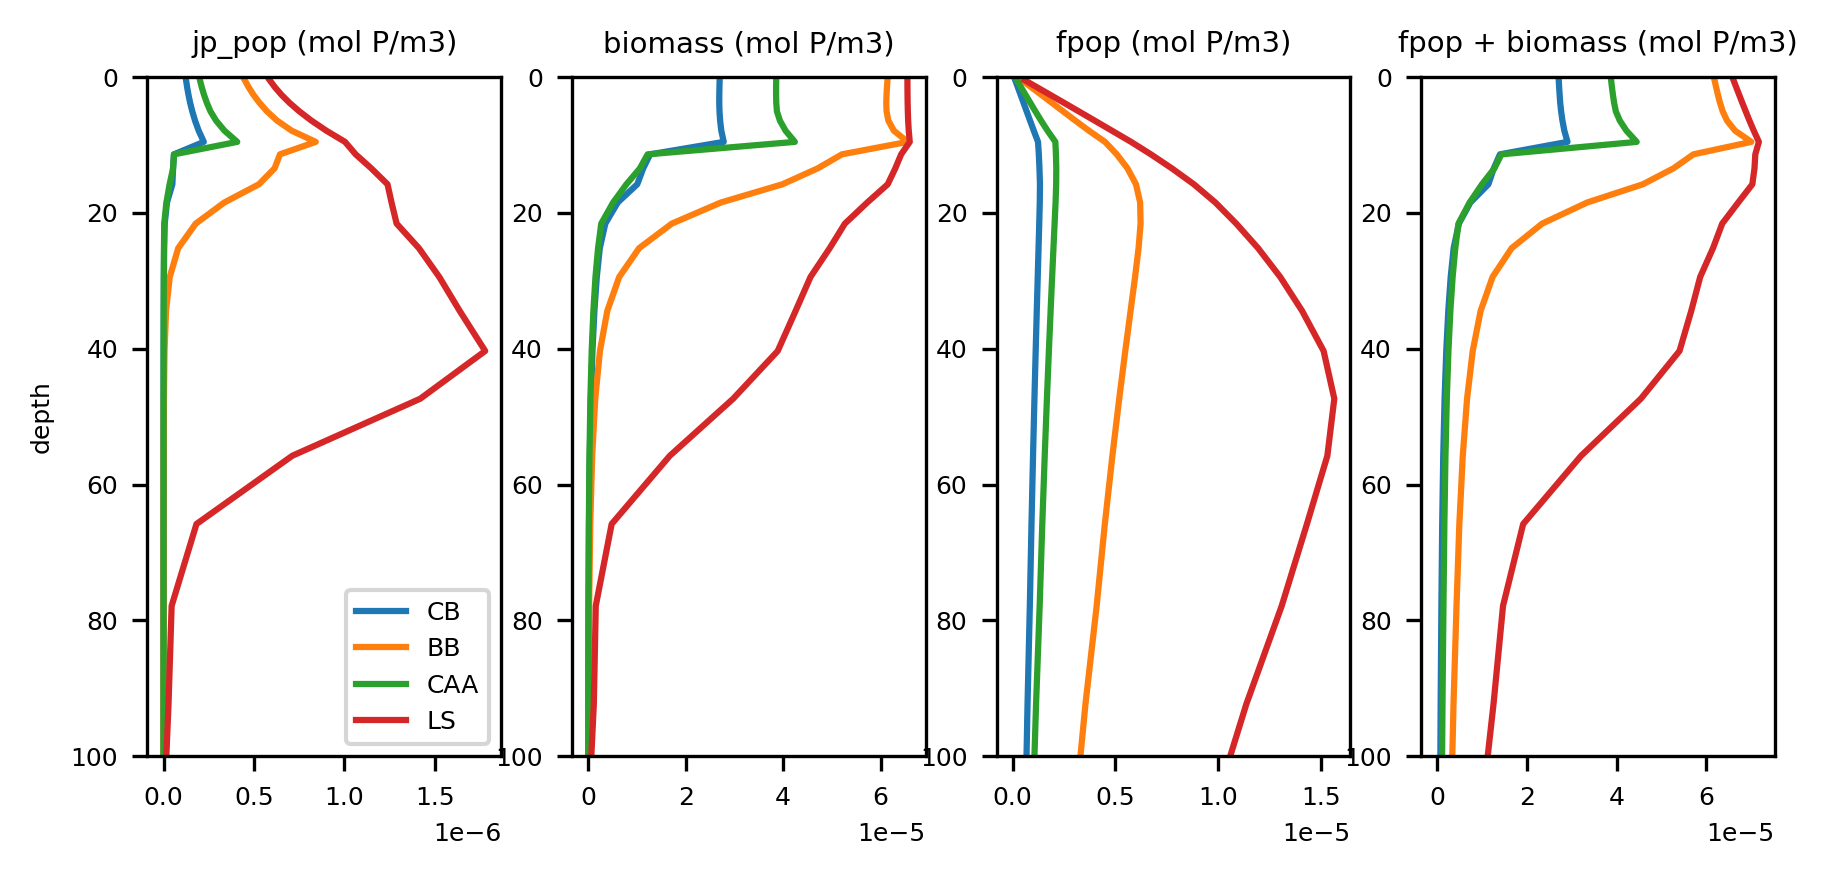

In [20]:
# Typical vertical profiles at the stations:
CB  = (680,190)
BB  = (480,195)
CAA = (585,153)
LS  = (400,185)

fig, ax = plt.subplots(1,4, figsize=(7,3), dpi=300)

ax[0].set_ylabel('depth', fontsize=6)

for axis in ax.ravel():
    axis.set_ylim(100,0)
    axis.xaxis.get_offset_text().set_size(fontsize=6)
    axis.tick_params(axis='both', labelsize=6)
    
ax[0].set_title('jp_pop (mol P/m3)', fontsize=7)
ax[0].plot(jppop_convert[:,CB[0],CB[1]]  , ANHA4_depths, label='CB')
ax[0].plot(jppop_convert[:,BB[0],BB[1]]  , ANHA4_depths, label='BB')
ax[0].plot(jppop_convert[:,CAA[0],CAA[1]], ANHA4_depths, label='CAA')
ax[0].plot(jppop_convert[:,LS[0],LS[1]]  , ANHA4_depths, label='LS')
ax[0].legend(loc=4, fontsize=6)

ax[1].set_title('biomass (mol P/m3)', fontsize=7)
ax[1].plot(biomass[:,CB[0],CB[1]]  , ANHA4_depths)
ax[1].plot(biomass[:,BB[0],BB[1]]  , ANHA4_depths)
ax[1].plot(biomass[:,CAA[0],CAA[1]], ANHA4_depths)
ax[1].plot(biomass[:,LS[0],LS[1]]  , ANHA4_depths)

ax[2].set_title('fpop (mol P/m3)', fontsize=7)
ax[2].plot(fpop_convert[:,CB[0],CB[1]]  , ANHA4_depths)
ax[2].plot(fpop_convert[:,BB[0],BB[1]]  , ANHA4_depths)
ax[2].plot(fpop_convert[:,CAA[0],CAA[1]], ANHA4_depths)
ax[2].plot(fpop_convert[:,LS[0],LS[1]]  , ANHA4_depths)

ax[3].set_title('fpop + biomass (mol P/m3)', fontsize=7)
ax[3].plot(biomass[:,CB[0],CB[1]]   + fpop_convert[:,CB[0],CB[1]]  , ANHA4_depths)
ax[3].plot(biomass[:,BB[0],BB[1]]   + fpop_convert[:,BB[0],BB[1]]  , ANHA4_depths)
ax[3].plot(biomass[:,CAA[0],CAA[1]] + fpop_convert[:,CAA[0],CAA[1]], ANHA4_depths)
ax[3].plot(biomass[:,LS[0],LS[1]]   + fpop_convert[:,LS[0],LS[1]]  , ANHA4_depths)

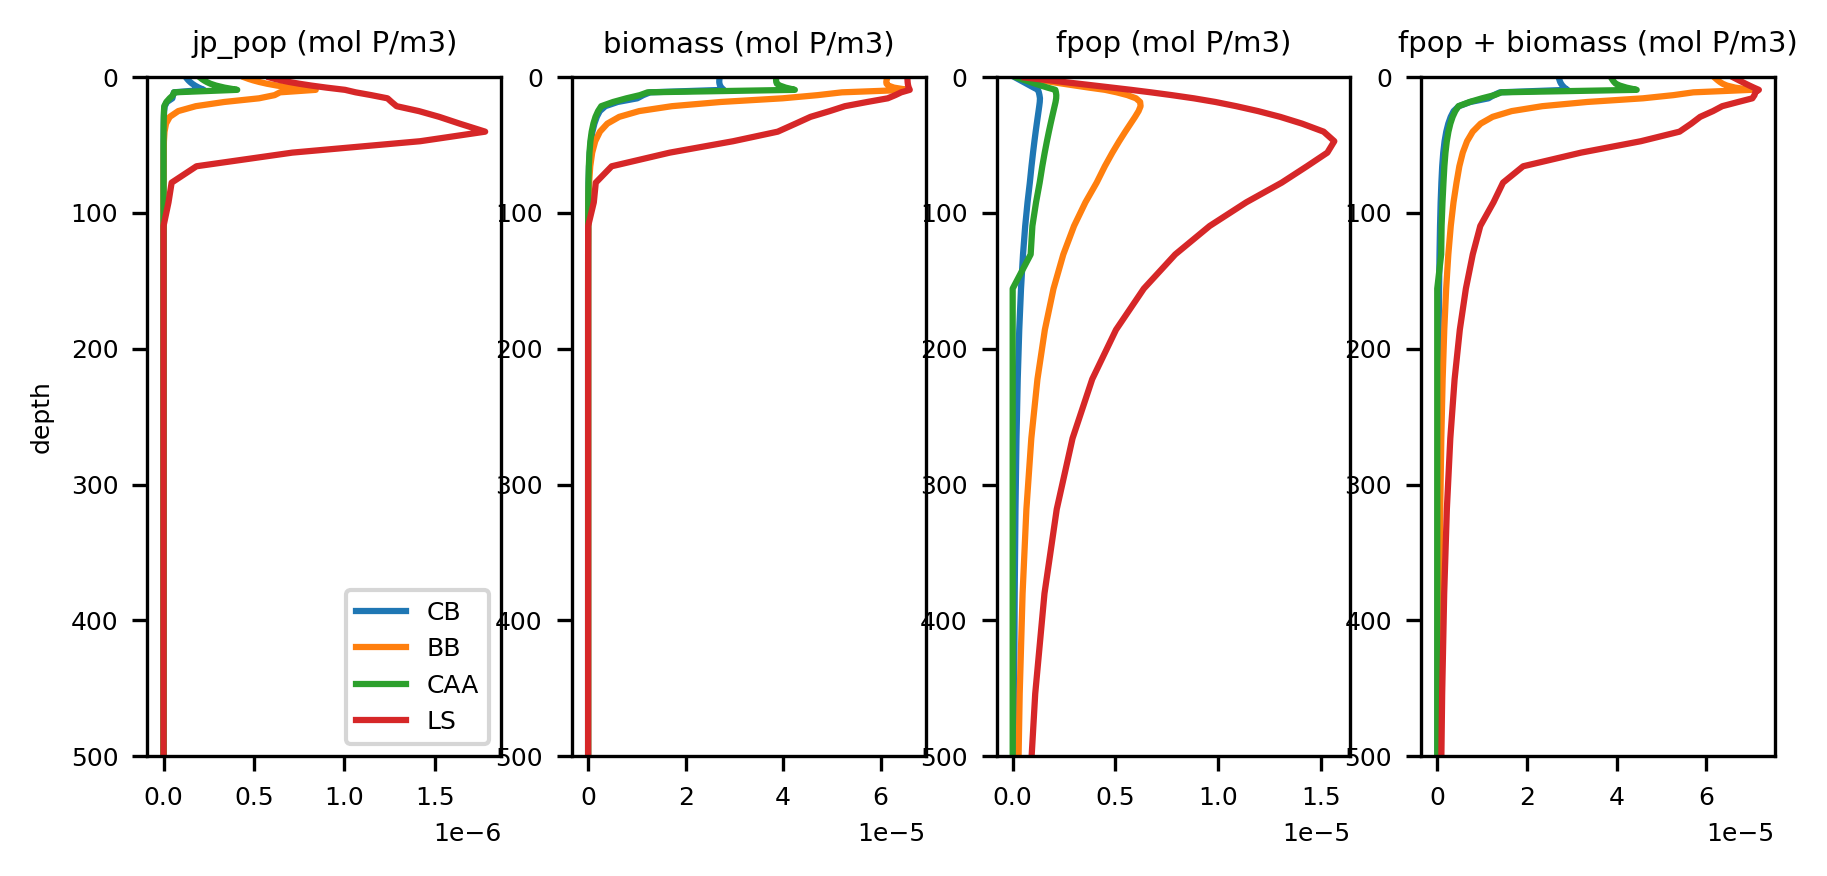

In [21]:
# Typical vertical profiles at the stations:
CB  = (680,190)
BB  = (480,195)
CAA = (585,153)
LS  = (400,185)

fig, ax = plt.subplots(1,4, figsize=(7,3), dpi=300)

ax[0].set_ylabel('depth', fontsize=6)

for axis in ax.ravel():
    axis.set_ylim(500,0)
    axis.xaxis.get_offset_text().set_size(fontsize=6)
    axis.tick_params(axis='both', labelsize=6)
    
ax[0].set_title('jp_pop (mol P/m3)', fontsize=7)
ax[0].plot(jppop_convert[:,CB[0],CB[1]]  , ANHA4_depths, label='CB')
ax[0].plot(jppop_convert[:,BB[0],BB[1]]  , ANHA4_depths, label='BB')
ax[0].plot(jppop_convert[:,CAA[0],CAA[1]], ANHA4_depths, label='CAA')
ax[0].plot(jppop_convert[:,LS[0],LS[1]]  , ANHA4_depths, label='LS')
ax[0].legend(loc=4, fontsize=6)

ax[1].set_title('biomass (mol P/m3)', fontsize=7)
ax[1].plot(biomass[:,CB[0],CB[1]]  , ANHA4_depths)
ax[1].plot(biomass[:,BB[0],BB[1]]  , ANHA4_depths)
ax[1].plot(biomass[:,CAA[0],CAA[1]], ANHA4_depths)
ax[1].plot(biomass[:,LS[0],LS[1]]  , ANHA4_depths)

ax[2].set_title('fpop (mol P/m3)', fontsize=7)
ax[2].plot(fpop_convert[:,CB[0],CB[1]]  , ANHA4_depths)
ax[2].plot(fpop_convert[:,BB[0],BB[1]]  , ANHA4_depths)
ax[2].plot(fpop_convert[:,CAA[0],CAA[1]], ANHA4_depths)
ax[2].plot(fpop_convert[:,LS[0],LS[1]]  , ANHA4_depths)

ax[3].set_title('fpop + biomass (mol P/m3)', fontsize=7)
ax[3].plot(biomass[:,CB[0],CB[1]]   + fpop_convert[:,CB[0],CB[1]]  , ANHA4_depths)
ax[3].plot(biomass[:,BB[0],BB[1]]   + fpop_convert[:,BB[0],BB[1]]  , ANHA4_depths)
ax[3].plot(biomass[:,CAA[0],CAA[1]] + fpop_convert[:,CAA[0],CAA[1]], ANHA4_depths)
ax[3].plot(biomass[:,LS[0],LS[1]]   + fpop_convert[:,LS[0],LS[1]]  , ANHA4_depths)

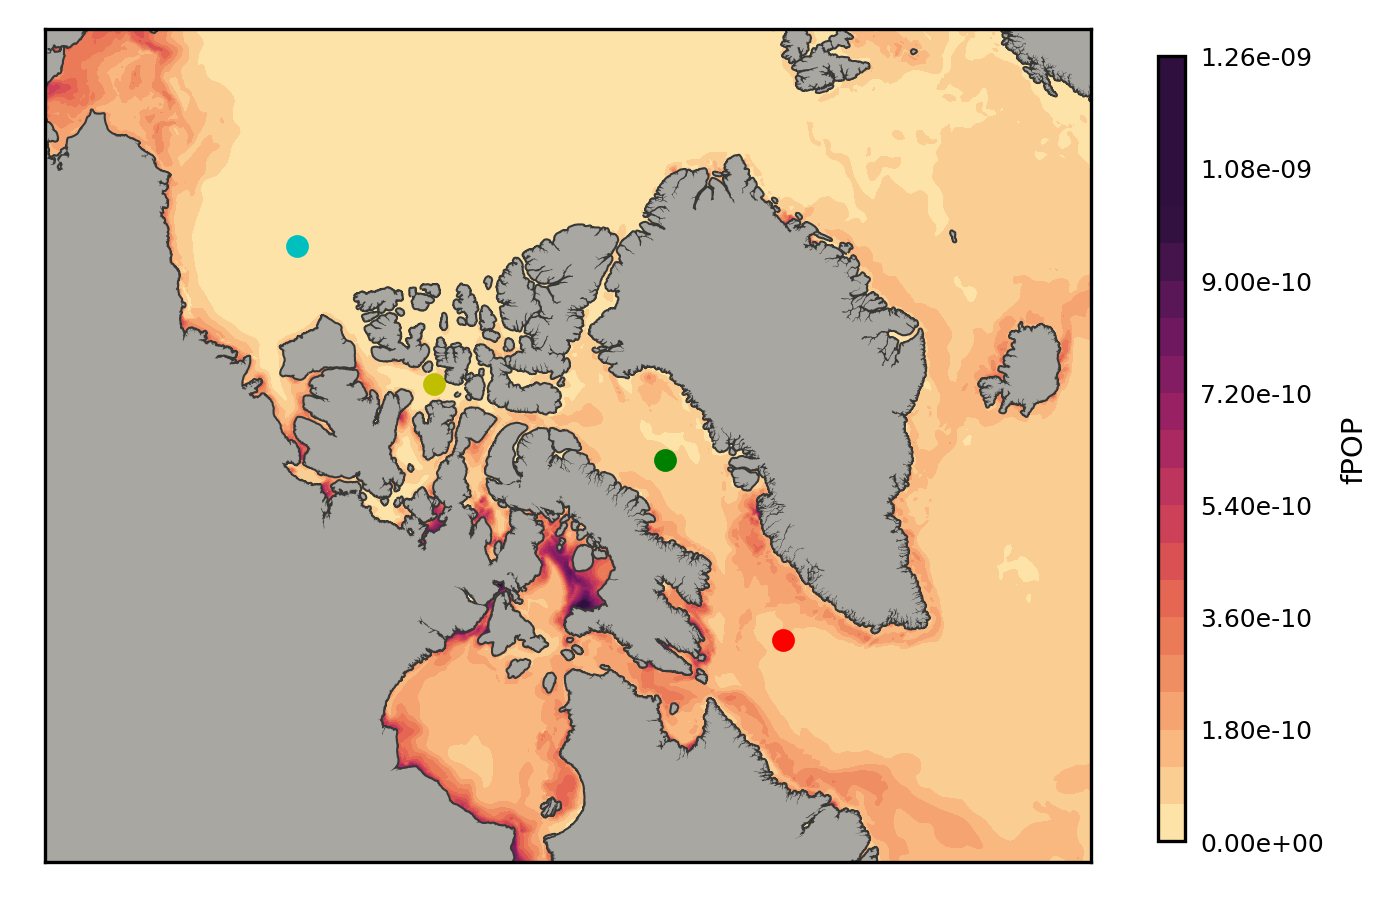

In [118]:
plot_slicemap(fpop, 0, vmax=1e-9)

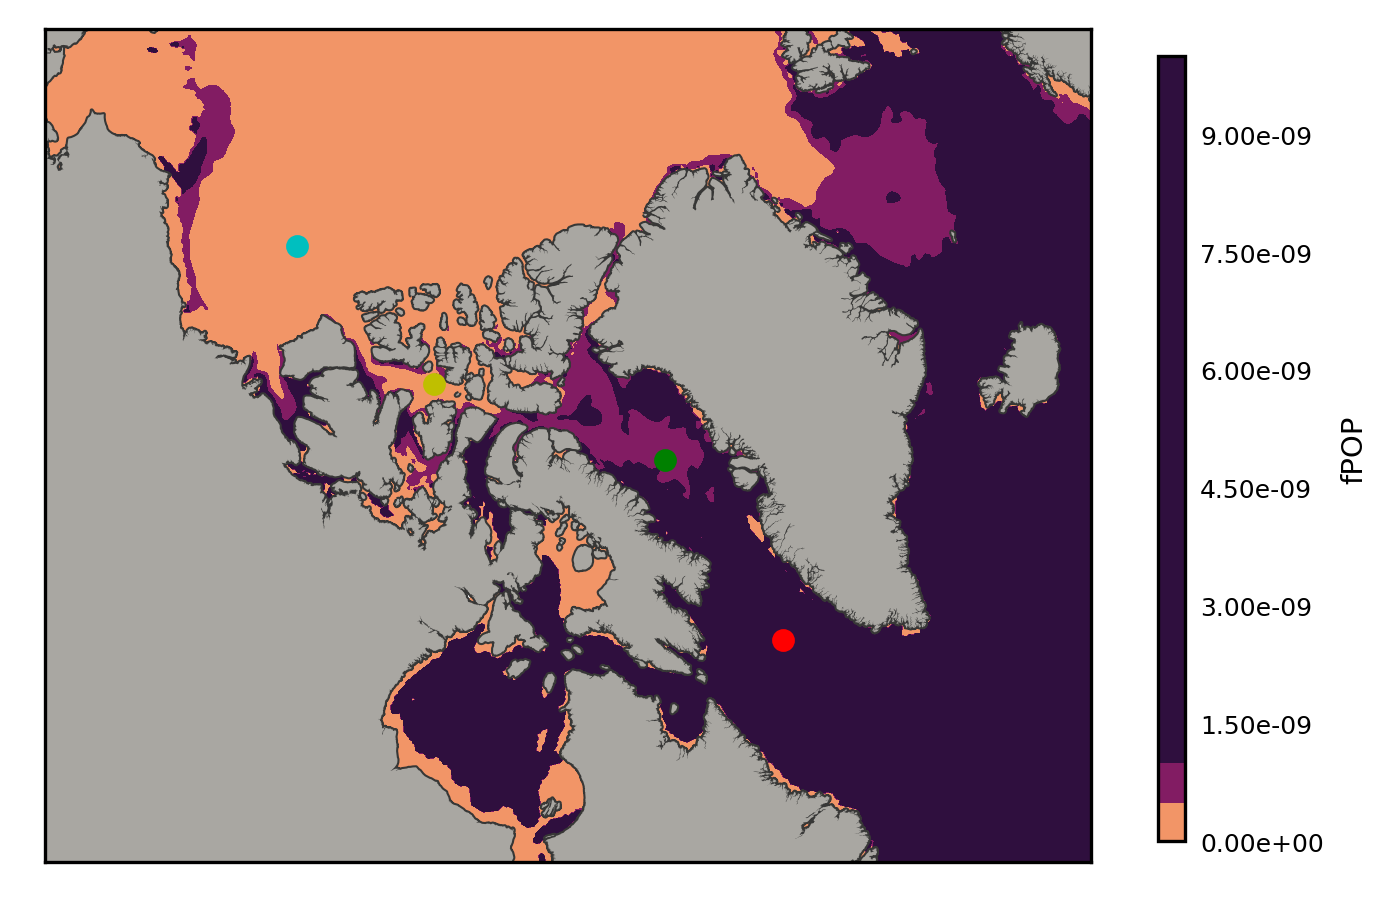

In [119]:
plot_slicemap(fpop, 20, vmax=1e-9)

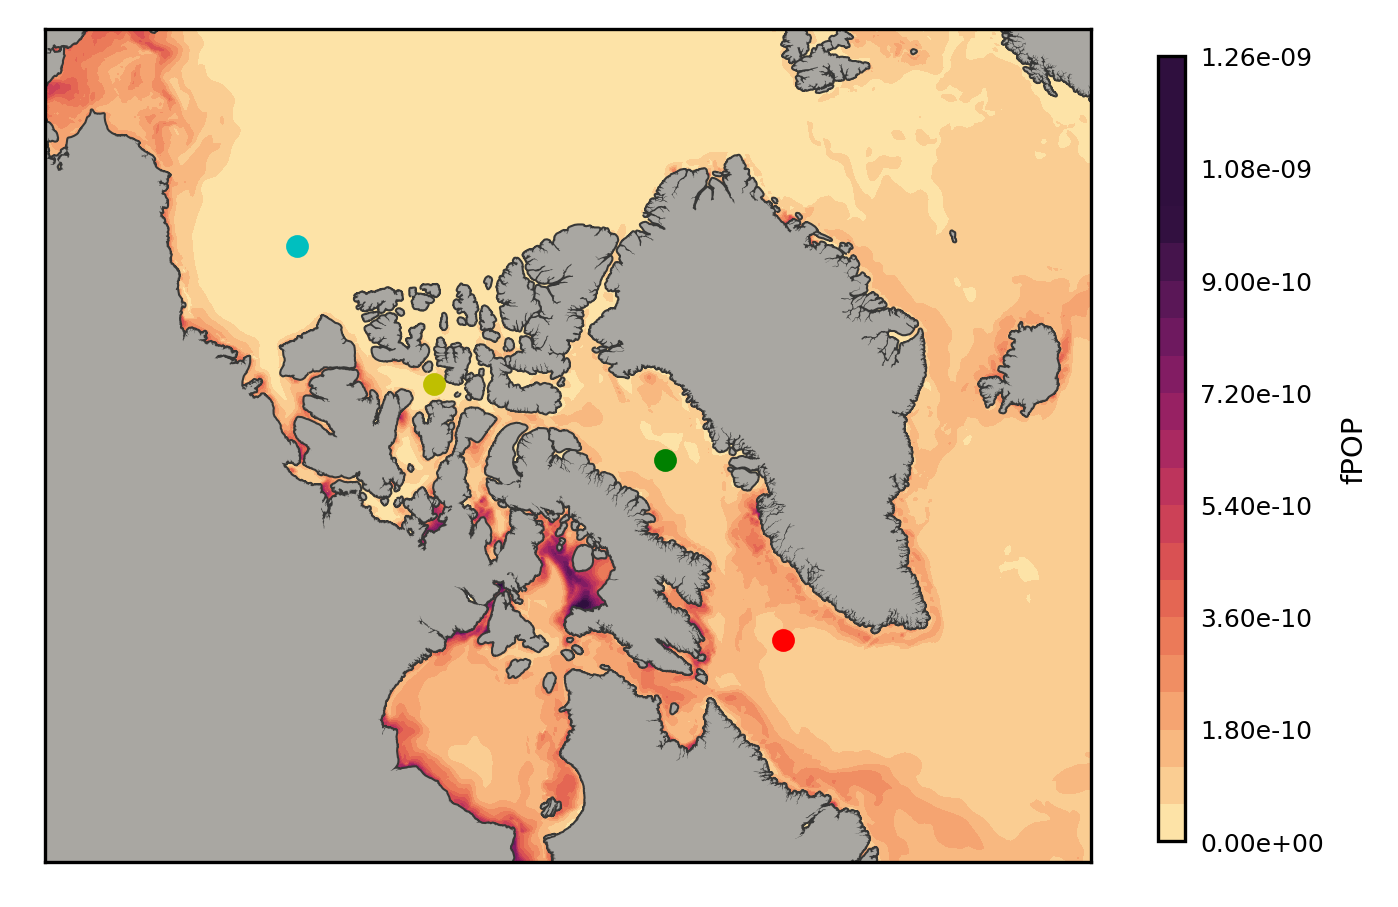

In [117]:
plot_slicemap(zflux, 0, vmax=1e-9)

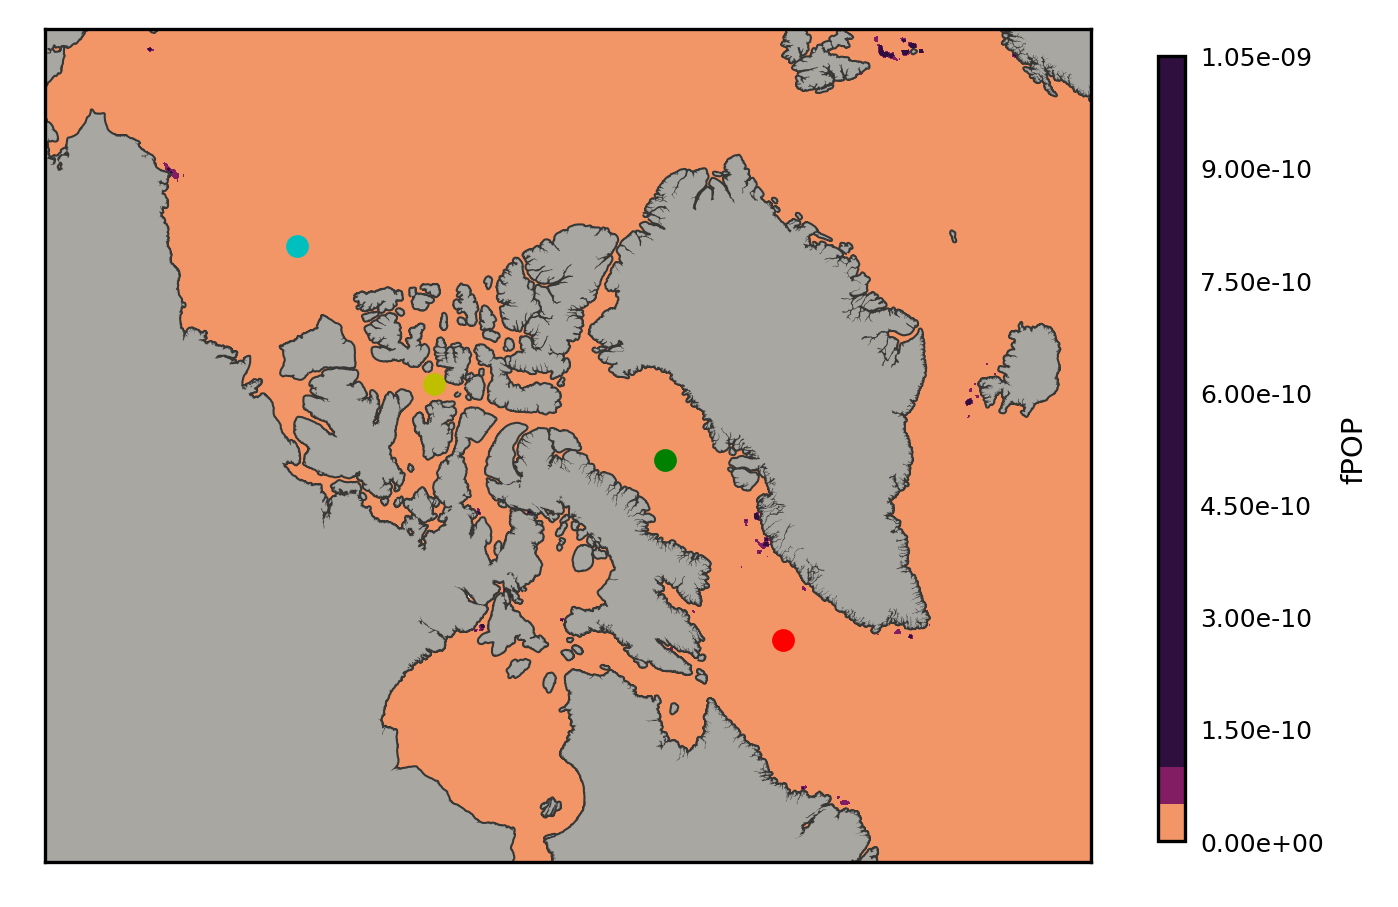

In [125]:
plot_slicemap(zflux, 20, vmax=1e-10)

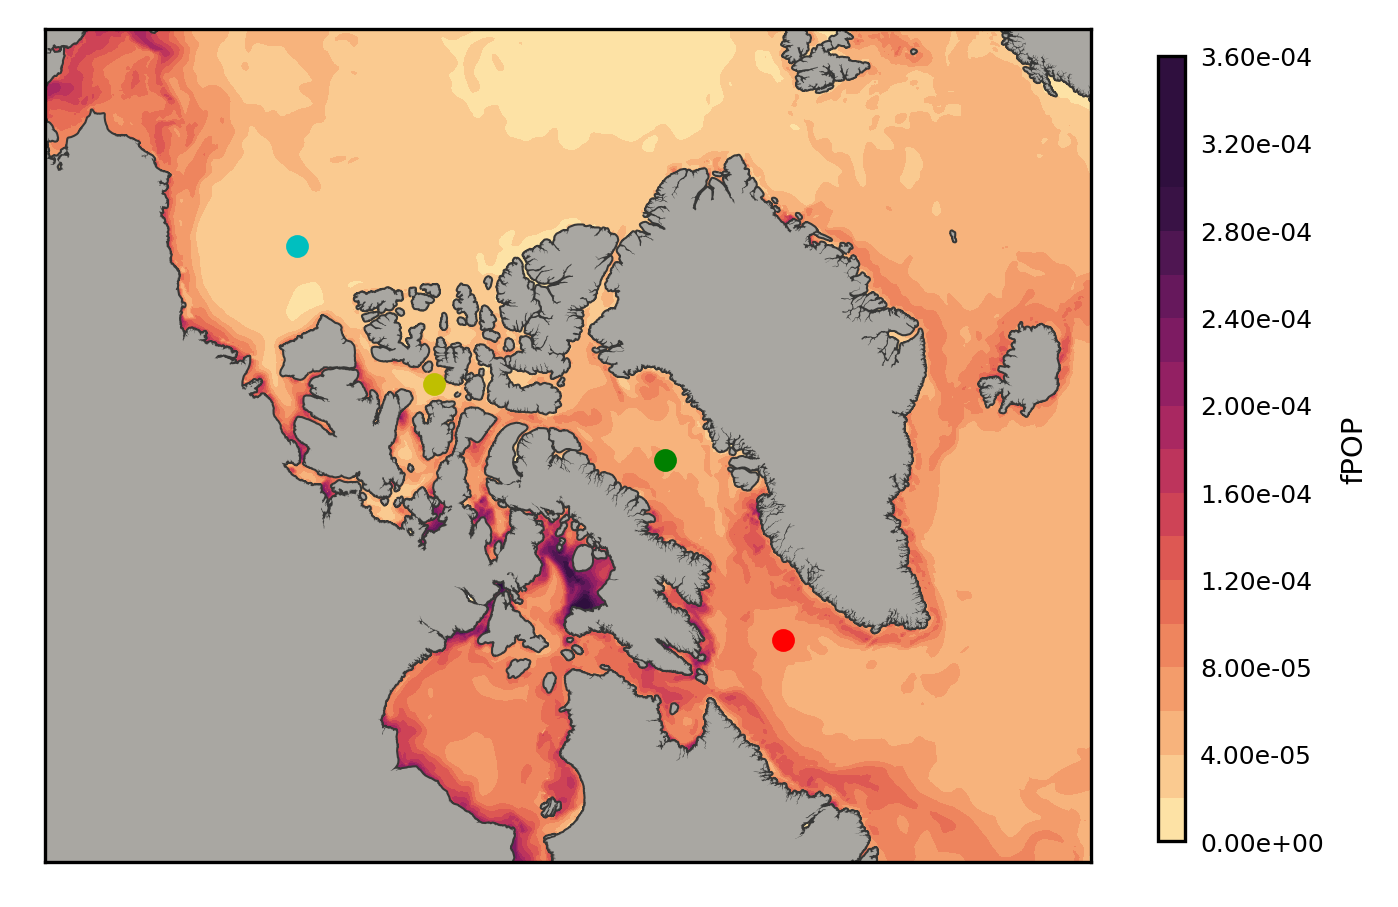

In [126]:
plot_slicemap(biomass, 0, vmax=3e-4)

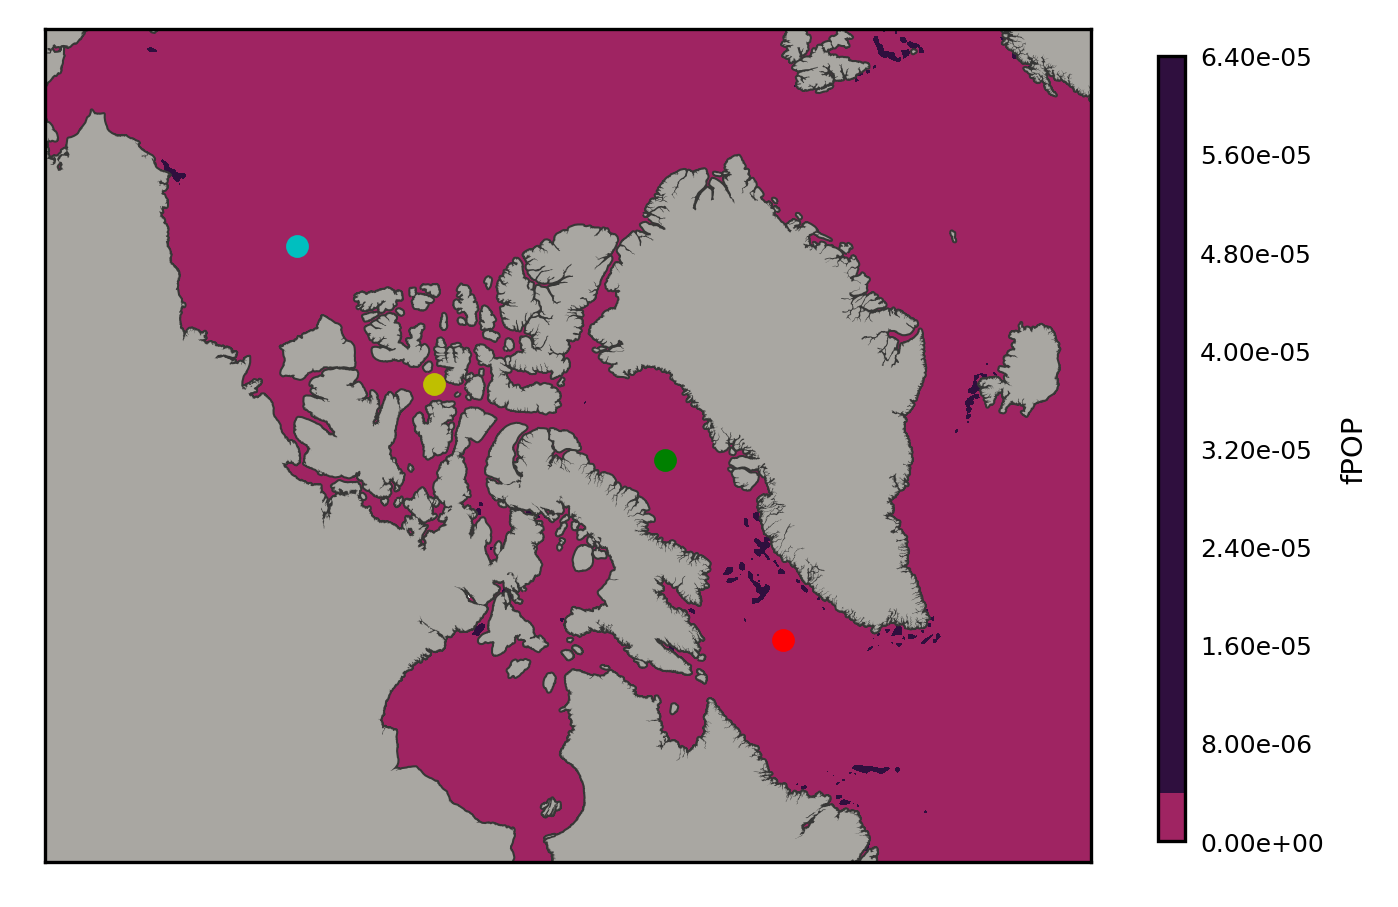

In [129]:
plot_slicemap(biomass, 20, vmax=3e-6)